In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('siris-C-22-08-2023.csv').drop(columns=['AOD'])

# Drop the 'Datetime' column as it is not needed for the regression
df = df.drop(columns=['Datetime'])

# Separate the target variable (PV INPUT) and features
target_variable = 'PV INPUT \nsiris C (kWh/kW)'
X = df.drop(columns=[target_variable])
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.005123655621711589
R-squared: 0.9445296226322453


In [ ]:
# Displaying the trained model weights
weights = pd.DataFrame({"Feature": X.columns, "Weight": model.coef_})
print("Intercept:", model.intercept_)
print(weights)

Intercept: 0.23296605208333332
               Feature    Weight
0  irradiance \n(W/m2)  0.260779
1                PM2.5  0.001966
2      Cloud cover (%) -0.010872
3          Temperature  0.033673


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called 'df'
# Extracting the datetime column and the target variable
df = pd.read_csv('Ilio.csv',header=0, names = ['Datetime','PV','Irradiance', 'PM2.5',  'Cloud','Temperature' ,'Clearness index'])
datetime_series = pd.to_datetime(df["Datetime"])
df.set_index(datetime_series, inplace=True)
df.drop('Datetime', axis = 1)

,PV,Irradiance,PM2.5,Cloud,Temperature,Clearness index
Datetime,,,,,,
2022-07-16 00:00:00,0.0000,0.00,9.171429,0,31.111111,0.00
2022-07-16 01:00:00,0.0000,0.00,9.160000,0,30.000000,0.00
2022-07-16 02:00:00,0.0000,0.00,9.600000,0,30.000000,0.00
2022-07-16 03:00:00,0.0000,0.00,9.246154,0,28.888889,0.00
2022-07-16 04:00:00,0.0000,0.00,7.441176,0,28.888889,0.00
...,...,...,...,...,...,...
2022-07-27 19:00:00,0.0518,163.02,21.600000,0,32.777778,0.59
2022-07-27 20:00:00,0.0003,18.37,24.350000,0,32.222222,0.40
2022-07-27 21:00:00,0.0000,0.00,24.500000,0,31.111111,0.00


In [ ]:

# Plotting the time series of PV INPUT
plt.figure(figsize=(12, 6))
plt.plot(datetime_series, pv_input_series, label="PV INPUT \nsiris C (kWh/kW)", color="blue")
plt.xlabel("Datetime")
plt.ylabel("PV INPUT \nsiris C (kWh/kW)")
plt.title("Time Series of PV INPUT \nsiris C (kWh/kW)")
plt.legend()
plt.show()

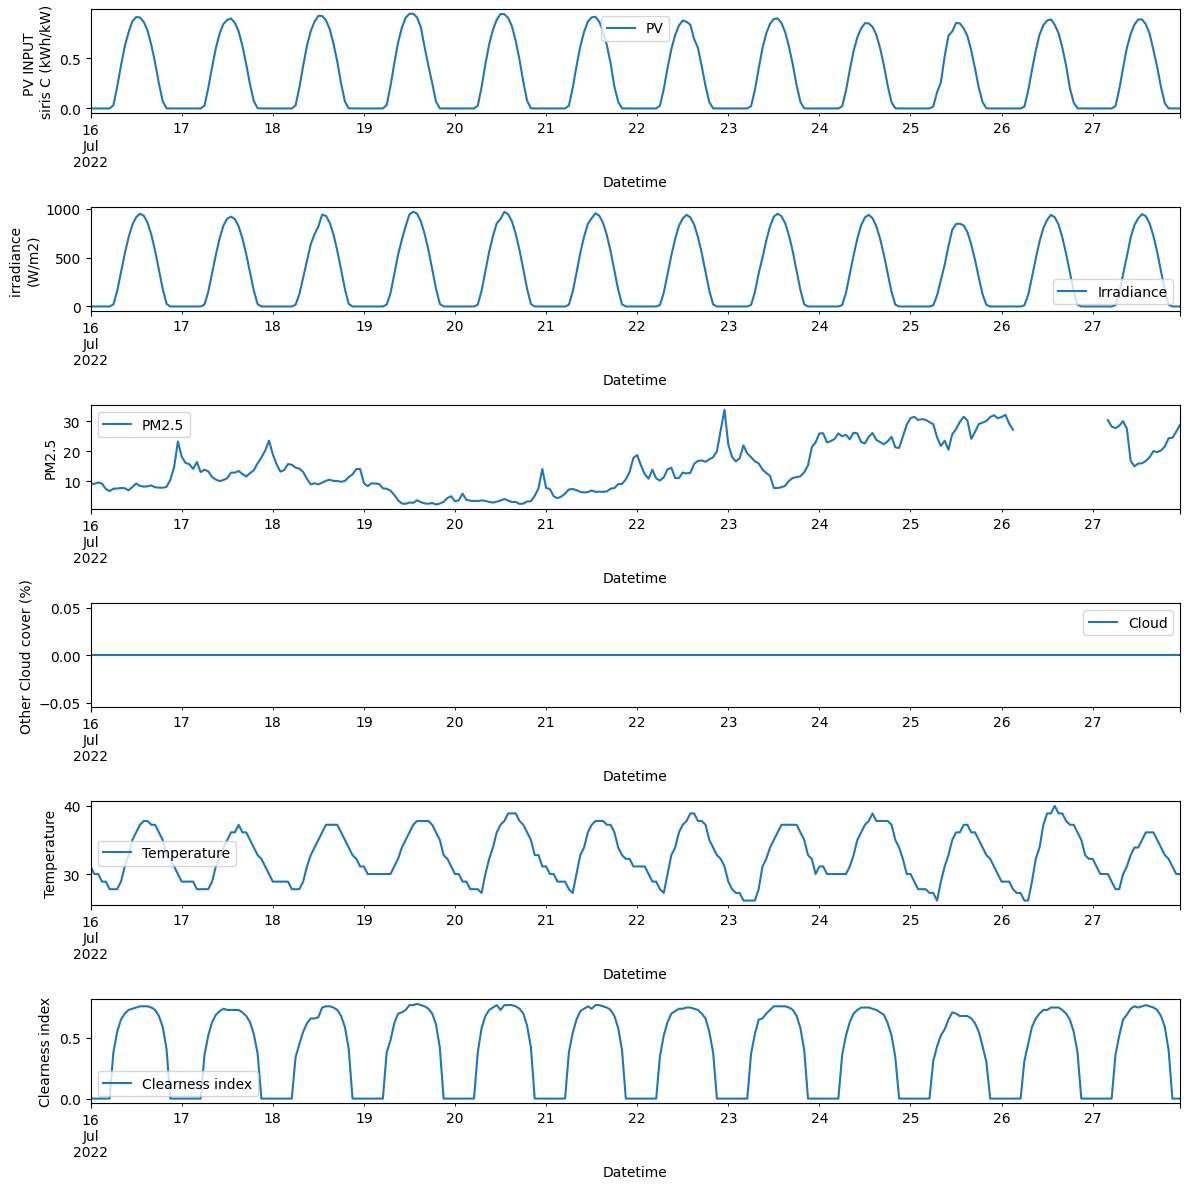

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called 'df'
# Extracting the datetime column and the target variables
#datetime_series = pd.to_datetime(df["Datetime"])
#pv_input_series = df["PV INPUT \nsiris C (kWh/kW)"]
#other_variable1_series = df["irradiance \n(W/m2)"]
#other_variable2_series = df["PM2.5"]
#other_variable3_series = df['Cloud cover (%)']
#other_variable4_series = df['Temperature']

# Plotting the time series of PV INPUT
plt.figure(figsize=(12, 12))

# Plotting PV INPUT
plt.subplot(6, 1, 1)
df['PV'].plot()
plt.xlabel("Datetime")
plt.ylabel("PV INPUT \nsiris C (kWh/kW)")
#plt.title("Time Series of PV INPUT \nsiris C (kWh/kW)")
plt.legend()

# Plotting Other Variable 1
plt.subplot(6, 1, 2)
df['Irradiance'].plot()
plt.xlabel("Datetime")
plt.ylabel("irradiance \n(W/m2)")
#plt.title("Time Series of irradiance \n(W/m2)")
plt.legend()

# Plotting Other Variable 2
plt.subplot(6, 1, 3)
df['PM2.5'].plot()
plt.xlabel("Datetime")
plt.ylabel("PM2.5")
#plt.title("Time Series of PM2.5")
plt.legend()

# Plotting Other Variable 3
plt.subplot(6, 1, 4)
df['Cloud'].plot()
plt.xlabel("Datetime")
plt.ylabel("Other Cloud cover (%)")
#plt.title("Time Series of Other Cloud cover (%)")
plt.legend()

# Plotting Other Variable 4
plt.subplot(6, 1, 5)
df['Temperature'].plot()
plt.xlabel("Datetime")
plt.ylabel("Temperature")
#plt.title("Time Series of Temperature")
plt.legend()

# Plotting Other Variable 6
plt.subplot(6, 1, 6)
df['Clearness index'].plot()
plt.xlabel("Datetime")
plt.ylabel("Clearness index")
#plt.title("Time Series of Clearness index")
plt.legend()
plt.tight_layout()
plt.show()


## Site B: Koropi

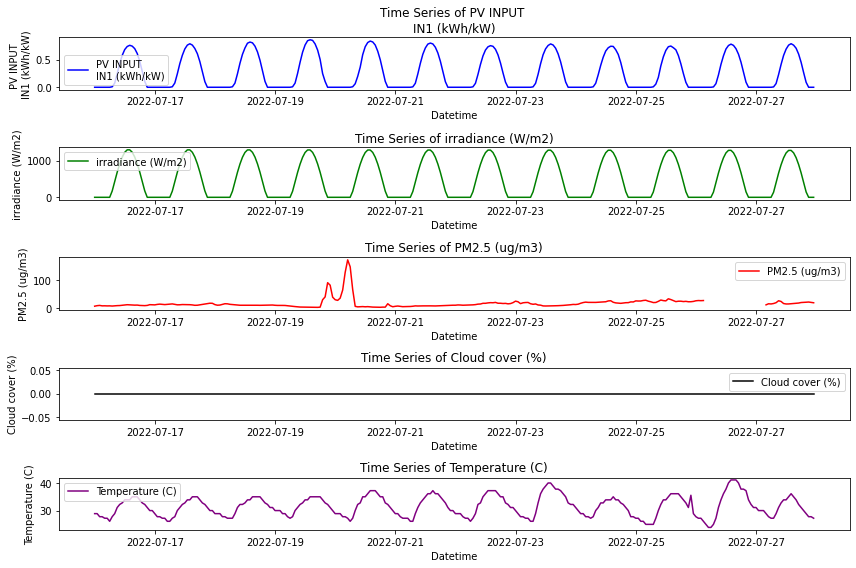

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('IN1-20-07-2022.csv').drop(columns=['AOD'])

pv = '''PV INPUT
IN1 (kWh/kW)'''
irr = 'irradiance (W/m2)'
pm25 = 'PM2.5 (ug/m3)'
cloud = 'Cloud cover (%)'
temp = 'Temperature (C)'

# Assuming your data is in a DataFrame called 'df'
# Extracting the datetime column and the target variables
datetime_series = pd.to_datetime(df["Datetime"])
pv_input_series = df[pv]
other_variable1_series = df[irr]
other_variable2_series = df[pm25]
other_variable3_series = df[cloud]
other_variable4_series = df[temp]

# Plotting the time series of PV INPUT
plt.figure(figsize=(12, 8))

# Plotting PV INPUT
plt.subplot(5, 1, 1)
plt.plot(datetime_series, pv_input_series, label=pv, color="blue")
plt.xlabel("Datetime")
plt.ylabel(pv)
plt.title(f"Time Series of {pv}")
plt.legend()

# Plotting Other Variable 1
plt.subplot(5, 1, 2)
plt.plot(datetime_series, other_variable1_series, label=irr, color="green")
plt.xlabel("Datetime")
plt.ylabel(irr)
plt.title(f"Time Series of {irr}")
plt.legend()

# Plotting Other Variable 2
plt.subplot(5, 1, 3)
plt.plot(datetime_series, other_variable2_series, label=pm25, color="red")
plt.xlabel("Datetime")
plt.ylabel(pm25)
plt.title(f"Time Series of {pm25}")
plt.legend()

# Plotting Other Variable 3
plt.subplot(5, 1, 4)
plt.plot(datetime_series, other_variable3_series, label=cloud, color="black")
plt.xlabel("Datetime")
plt.ylabel(cloud)
plt.title(f"Time Series of {cloud}")
plt.legend()

# Plotting Other Variable 4
plt.subplot(5, 1, 5)
plt.plot(datetime_series, other_variable4_series, label=temp, color="purple")
plt.xlabel("Datetime")
plt.ylabel(temp)
plt.title(f"Time Series of {temp}")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('IN1-20-07-2022.csv').drop(columns=['AOD']).dropna(axis=0)

# Drop the 'Datetime' column as it is not needed for the regression
df = df.drop(columns=['Datetime'])

# Separate the target variable (PV INPUT) and features
target_variable = pv
X = df.drop(columns=[target_variable])
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.003265746006402493
R-squared: 0.9569768562289387


In [ ]:
# Displaying the trained model weights
weights = pd.DataFrame({"Feature": X.columns, "Weight": model.coef_})
print("Intercept:", model.intercept_)
print(weights)

Intercept: 0.2779670947867299
             Feature    Weight
0  irradiance (W/m2)  0.271322
1      PM2.5 (ug/m3)  0.000302
2    Cloud cover (%)  0.000000
3    Temperature (C)  0.046831
